In [1]:
import fastf1
import pandas as pd

DRIVERS_2024 = ['Max Verstappen', 'Lando Norris', 'Charles Leclerc', 'Oscar Piastri', 'Carlos Sainz',
                'George Russell', 'Lewis Hamilton', 'Sergio Perez', 'Fernando Alonso', 'Pierre Gasly',
                'Nico Hulkenberg', 'Yuki Tsuonoda', 'Lance Stroll', 'Esteban Ocon', 'Kevin Magnussen',
                'Alexander Albon', 'Daniel Ricciardo', 'Oliver Bearman', 'Franco Colapinto', 'Zhou Guanyu',
                'Liam Lawson', 'Valtteri Bottas', 'Logan Sargeant', 'Jack Doohan']

In [ ]:
drivers_results = []
events = fastf1.get_event_schedule(2024)
for race_id, event in events.iterrows():
    if event['EventFormat'] == 'testing':
        continue
    else:
        race = event.get_race()
        race.load(laps=False, telemetry=False, weather=False, messages=False, livedata=False)
        race_results = race.results

        for driver in DRIVERS_2024:
            driver_race_result = race_results.loc[race_results['FullName'] == driver]
            if not driver_race_result.empty:
                driver_race_result = driver_race_result.iloc[0]
                q_pos = driver_race_result['GridPosition']
                r_pos = driver_race_result['Position']
                col = driver_race_result['TeamColor']
                drivers_results.append({
                    'driver': driver,
                    'race': race_id,
                    'Q': q_pos,
                    'R': r_pos,
                    'Color': f'#{col}'
                })

In [22]:
for i in range(1,6):
    print(drivers_results[i])

print(len(drivers_results))

{'driver': 'Lando Norris', 'race': 1, 'Q': np.float64(7.0), 'R': np.float64(6.0)}
{'driver': 'Charles Leclerc', 'race': 1, 'Q': np.float64(2.0), 'R': np.float64(4.0)}
{'driver': 'Oscar Piastri', 'race': 1, 'Q': np.float64(8.0), 'R': np.float64(8.0)}
{'driver': 'Carlos Sainz', 'race': 1, 'Q': np.float64(4.0), 'R': np.float64(3.0)}
{'driver': 'George Russell', 'race': 1, 'Q': np.float64(3.0), 'R': np.float64(5.0)}
431


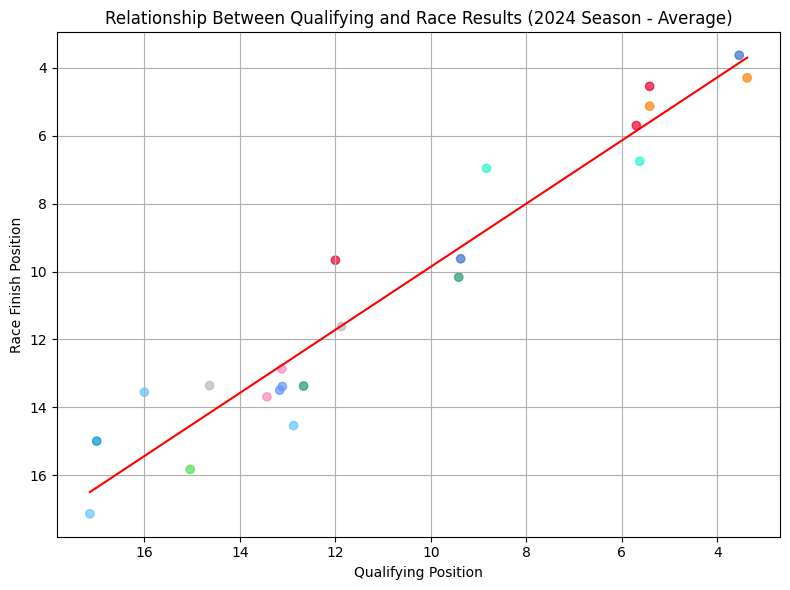

In [39]:
import matplotlib.pyplot as plt
import numpy as np
# Convert to DataFrame
df = pd.DataFrame(drivers_results)

avg_positions = df.groupby('driver')[['Q', 'R']].mean().reset_index()
colors = df.groupby('driver')['Color'].first()

avg_positions = avg_positions.join(colors, on='driver')
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(avg_positions['Q'], avg_positions['R'], c=avg_positions['Color'], alpha=0.7)

# Fit linear regression line (degree 1 polynomial)
coef = np.polyfit(avg_positions['Q'], avg_positions['R'], 1)
poly1d_fn = np.poly1d(coef)

# Plot regression line over the range of Q values
x_range = np.linspace(avg_positions['Q'].min(), avg_positions['Q'].max(), 100)
plt.plot(x_range, poly1d_fn(x_range), color='red')

# Invert axes: lower is better (1 is best)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Labels and title
plt.title('Relationship Between Qualifying and Race Results (2024 Season - Average)')
plt.xlabel('Qualifying Position')
plt.ylabel('Race Finish Position')
plt.grid(True)
plt.tight_layout()
plt.show()